In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data import TimeSeriesData
from src.models import ARMADataGenerator
from src.utils import PrecipitationClassifier
from src.generators import WeatherGenerator


In [3]:
path = "/Users/cooper/Desktop/precipitation-generator/data/raw/GSTEIGmeteo.csv"
ts_data = TimeSeriesData.from_csv(path)

In [4]:
ts_data.data

,precipitation
date,
1986-01-01,2.5
1986-01-02,0.2
1986-01-03,4.3
1986-01-04,3.4
1986-01-05,3.6
...,...
2000-09-26,0.0
2000-09-27,0.0
2000-09-28,0.0


In [5]:
ts_data.get_time_resolution()

'D'

In [6]:
weelkly_data = ts_data.resample_data("W")
weelkly_data.data

,precipitation
date,
1986-01-05,2.800000
1986-01-12,6.600000
1986-01-19,13.971429
1986-01-26,8.228571
1986-02-02,6.000000
...,...
2000-09-03,3.071429
2000-09-10,2.300000
2000-09-17,0.471429


In [7]:
ts_data.data

,precipitation
date,
1986-01-01,2.5
1986-01-02,0.2
1986-01-03,4.3
1986-01-04,3.4
1986-01-05,3.6
...,...
2000-09-26,0.0
2000-09-27,0.0
2000-09-28,0.0


In [8]:
filtered_data = ts_data.filter_by_date_range('1986-01-05', '1987-01-01')
filtered_data.data


,precipitation
date,
1986-01-05,3.6
1986-01-06,2.0
1986-01-07,0.5
1986-01-08,6.7
1986-01-09,2.6
...,...
1986-12-28,3.6
1986-12-29,0.7
1986-12-30,0.0


In [9]:
precip_series = ts_data.get_precipitation_series()
precip_series

date
1986-01-01     2.5
1986-01-02     0.2
1986-01-03     4.3
1986-01-04     3.4
1986-01-05     3.6
              ... 
2000-09-26     0.0
2000-09-27     0.0
2000-09-28     0.0
2000-09-29     5.0
2000-09-30    30.4
Name: precipitation, Length: 5387, dtype: float64

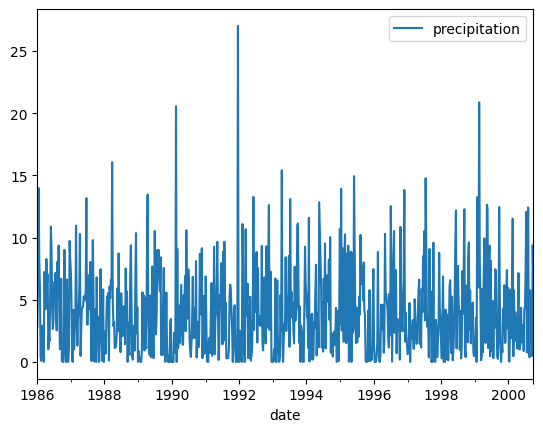

In [10]:
weelkly_data.plot()

In [11]:
arma_generator = ARMADataGenerator(order=(1,2), steps=365)
arma_generator.fit(ts_data.get_precipitation_series())
synthetic_data = arma_generator.generate(n_trajectories=200)


/opt/anaconda3/envs/PrecipGen/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/PrecipGen/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/PrecipGen/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Figure size 1000x500 with 0 Axes>

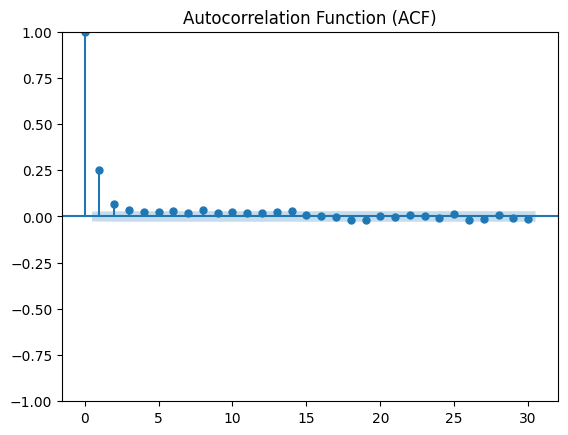

<Figure size 1000x500 with 0 Axes>

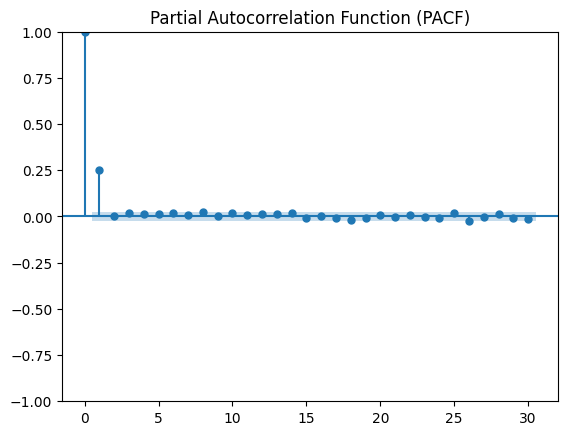

In [12]:
arma_generator.display_acf_plot(lags=30)
arma_generator.display_pacf_plot(lags=30)

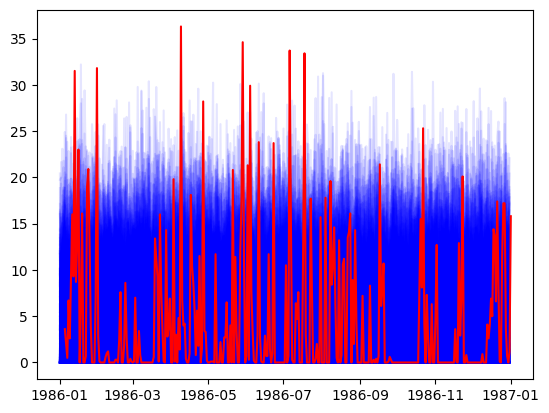

In [13]:
for i in range(1,201):
    plt.plot(synthetic_data[f"Sim_{i}"], color='blue', alpha=0.1)

plt.plot(filtered_data.get_precipitation_series(), color='red')
plt.show()

In [14]:
classifier = PrecipitationClassifier(categories=["very_dry", "dry", "normal", "wet", "very_wet"])
classified_data = classifier.classify_precipitation(synthetic_data)


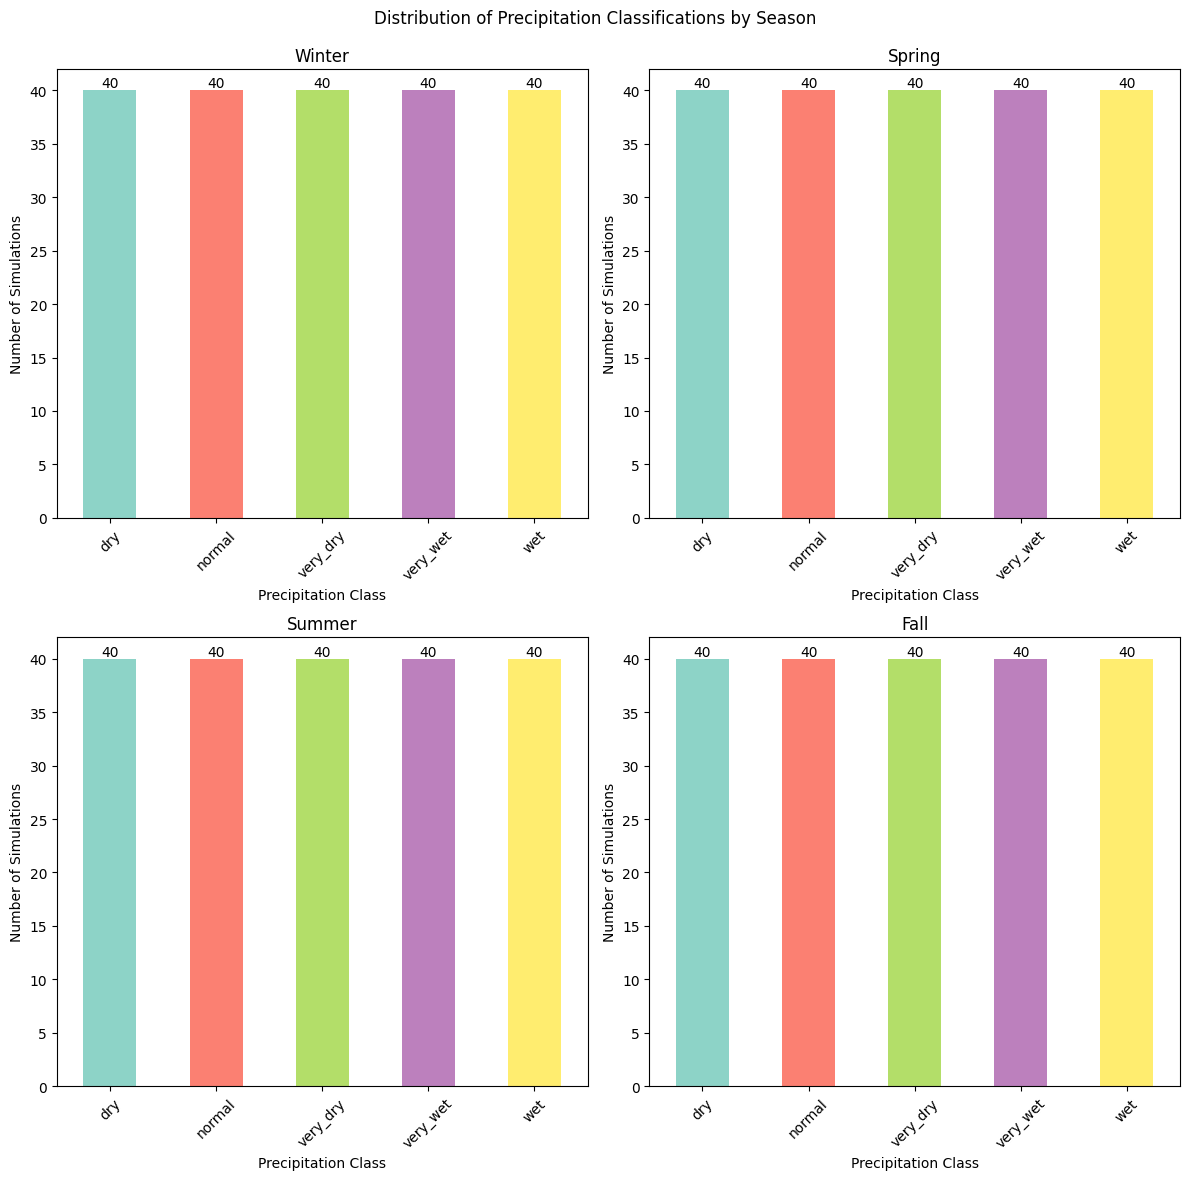

In [15]:
# Plot the distribution of classifications
classifier.plot_classification_distribution(classified_data)

the percentiles are: [20. 40. 60. 80.]
the thresholds are: [420.17103664 455.37842165 487.8207697  531.20240665]


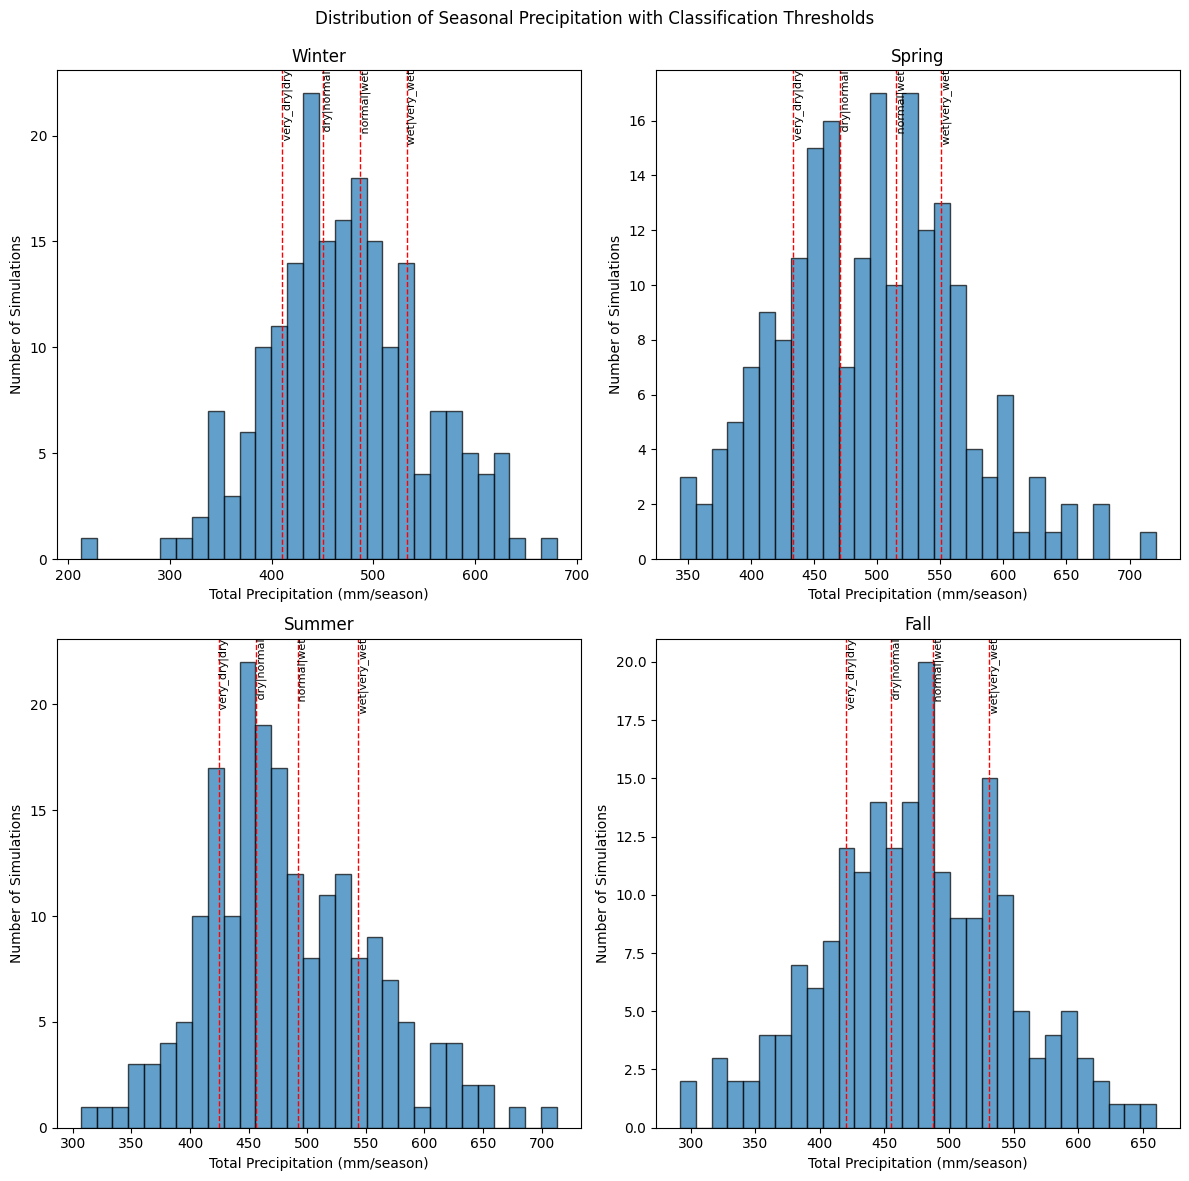

In [16]:
# Plot the distribution of mean annual precipitation
classifier.plot_seasonal_precipitation_distribution(synthetic_data)

In [17]:
# Print the classification results
print(classified_data)

           Winter    Spring    Summer      Fall
Sim_1    very_dry  very_dry       wet    normal
Sim_2         dry    normal  very_dry  very_dry
Sim_3    very_dry       dry       wet  very_dry
Sim_4         wet       wet       wet    normal
Sim_5    very_wet    normal  very_dry  very_dry
...           ...       ...       ...       ...
Sim_196       dry  very_wet       dry       dry
Sim_197  very_wet       wet       wet  very_dry
Sim_198       wet    normal       wet  very_wet
Sim_199  very_wet       wet       dry       wet
Sim_200  very_dry       dry    normal  very_wet

[200 rows x 4 columns]


In [18]:
weather_gen = WeatherGenerator(synthetic_data, classified_data)

In [29]:
year_structure = [
    ('Winter', 'wet'),
    ('Spring', 'wet'),
    ('Summer', 'wet'),
    ('Fall', 'wet')
]

In [30]:
scenario = weather_gen.generate_weather(year_structure, num_years=14)

print(scenario)

               precipitation
simulated_day               
1                   7.400078
2                   0.000000
3                   3.873061
4                   6.409305
5                  15.191868
...                      ...
5106                1.579143
5107                5.793890
5108               11.804056
5109                0.000000
5110                0.126320

[5110 rows x 1 columns]


            precipitation  observed_day
date                                   
1986-01-01            2.5             0
1986-01-02            0.2             1
1986-01-03            4.3             2
1986-01-04            3.4             3
1986-01-05            3.6             4
            precipitation  observed_day
date                                   
1999-12-28           28.3          5109
1999-12-29            7.9          5110
1999-12-30            0.0          5111
1999-12-31            0.6          5112
2000-01-01            0.0          5113


/var/folders/y6/kqwqph4s3sj7hkxryrly5y6r0000gn/T/ipykernel_97158/1557063666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  observed["observed_day"] = [i for i in range(len(observed))]


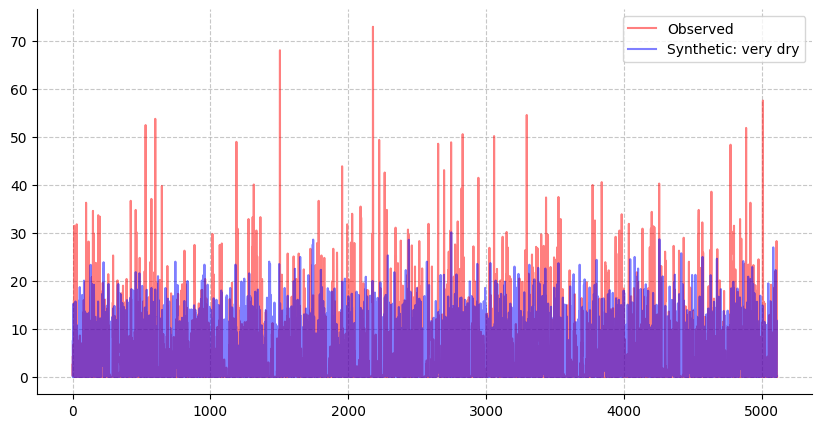

mean observed precipitation: 3.92
mean synthetic precipitation: 5.64


In [31]:
observed = ts_data.data["1986-01-01":"2000-01-01"]
observed["observed_day"] = [i for i in range(len(observed))]

print(observed.head())
print(observed.tail())

plt.figure(figsize=(10, 5))
plt.plot(
    observed["observed_day"],
    observed["precipitation"],
    color="red",
    alpha=0.5,
    label="Observed",
)
plt.plot(
    scenario["precipitation"], color="blue", alpha=0.5, label="Synthetic: very dry"
)

plt.legend()
sns.despine()
plt.grid(linestyle="--", alpha=0.7)

plt.show()

print(f"mean observed precipitation: {observed['precipitation'].mean().round(2)}")
print(f"mean synthetic precipitation: {scenario['precipitation'].mean().round(2)}")

In [22]:
print(scenario.head())  # This will now show simulated_day as the index
print(scenario.tail())  # You can see how the simulated days continue for multiple years

               precipitation
simulated_day               
1                   1.224263
2                   7.773138
3                   2.530124
4                   5.944658
5                   3.956149
               precipitation
simulated_day               
5471                3.013936
5472               13.111274
5473                0.415177
5474                6.084995
5475                7.886981


In [23]:
multi_year_structure = [
    [('Winter', 'wet'), ('Spring', 'normal'), ('Summer', 'dry'), ('Fall', 'normal')],
    [('Winter', 'very_wet'), ('Spring', 'wet'), ('Summer', 'normal'), ('Fall', 'dry')],
    [('Winter', 'normal'), ('Spring', 'dry'), ('Summer', 'very_dry'), ('Fall', 'wet')],
    [('Winter', 'dry'), ('Spring', 'very_dry'), ('Summer', 'wet'), ('Fall', 'very_wet')],
    [('Winter', 'wet'), ('Spring', 'normal'), ('Summer', 'dry'), ('Fall', 'normal')]
]

scenario_2 = weather_gen.generate_weather(year_structure=multi_year_structure, num_years=2)

<Axes: xlabel='simulated_day'>

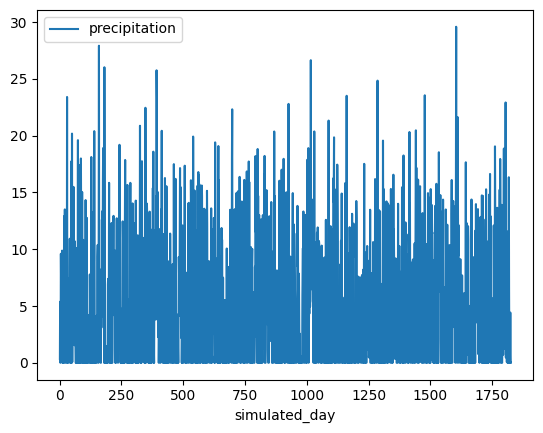

In [24]:
scenario_2.plot()